In [18]:
import os
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [19]:

images_train = []
labels_train = []
for filename in os.listdir('training/angry'):
    input_image = cv2.imread('training/angry/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([1, 0, 0, 0])
for filename in os.listdir('training/happy'):
    input_image = cv2.imread('training/happy/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 1, 0, 0])
for filename in os.listdir('training/neutral'):
    input_image = cv2.imread('training/neutral/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 0, 1, 0])
for filename in os.listdir('training/sad'):
    input_image = cv2.imread('training/sad/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 0, 0, 1])
print(labels_train)

[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0

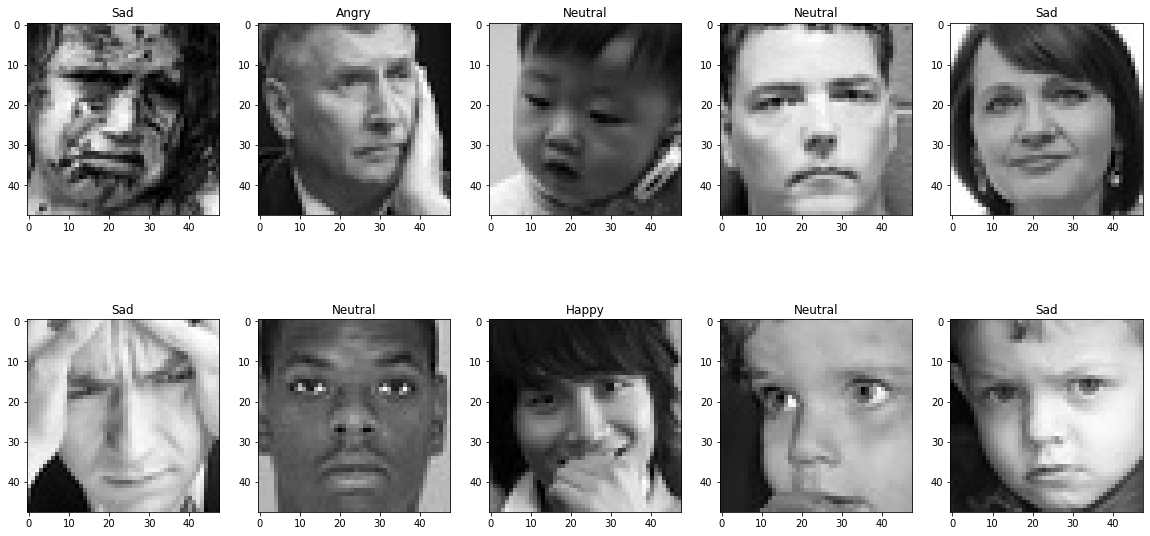

In [20]:
fig=plt.figure(figsize=(20,20))

nrows = 2
ncols = 5
happy = 0
neutral = 0
angry = 0
sad = 0

for i in range (1, nrows*ncols+1):
    index = np.random.randint(0, len(images_train))
    img = images_train[index]
    if labels_train[index][0] == 1:
        title = 'Angry'
        angry += 1
    elif labels_train[index][1] == 1:
        title = 'Happy'
        happy += 1
    elif labels_train[index][2] == 1:
        title = 'Neutral'
        neutral += 1
    elif labels_train[index][3] == 1:
        title = 'Sad'
        sad += 1

    if i < 6:
        fig.add_subplot(1,ncols,i)
    else:
        fig.add_subplot(2,ncols,i)
    plt.imshow(img, cmap='gray')
    plt.title(title)

plt.show()

In [21]:
print('Angry: ' + str(angry))
print('Happy: ' + str(happy))
print('Neutral: ' + str(neutral))
print('Sad: ' + str(sad))

Angry: 1
Happy: 1
Neutral: 4
Sad: 4


In [22]:

x_train, x_validation, y_train, y_validation = train_test_split(images_train, labels_train, test_size=0.1, random_state=1)

print(y_train)

x_train = np.asarray(x_train)
x_train = np.expand_dims(x_train, axis=0)
x_train = x_train.reshape(x_train.shape[1], x_train.shape[2], x_train.shape[3], x_train.shape[0])
y_train = np.asarray(y_train)

x_validation = np.asarray(x_validation)
x_validation = np.expand_dims(x_validation, axis=0)
x_validation = x_validation.reshape(x_validation.shape[1], x_validation.shape[2], x_validation.shape[3], x_validation.shape[0])
y_validation = np.asarray(y_validation)

[[0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0

In [23]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 48)        480       
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 48)       192       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 48)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 48)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 48)        0         
                                                                 
 flatten_1 (Flatten)         (None, 27648)            

In [24]:
%%time
epochs = 20
history = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    validation_data = (x_validation, y_validation)
)

Epoch 1/20
454/454 [==============================] - 75s 163ms/step - loss: 1.3030 - accuracy: 0.4613 - val_loss: 1.2019 - val_accuracy: 0.4923
Epoch 2/20
454/454 [==============================] - 77s 170ms/step - loss: 1.0696 - accuracy: 0.5533 - val_loss: 1.1478 - val_accuracy: 0.5214
Epoch 3/20
454/454 [==============================] - 75s 165ms/step - loss: 0.9337 - accuracy: 0.6169 - val_loss: 1.1814 - val_accuracy: 0.5133
Epoch 4/20
454/454 [==============================] - 75s 165ms/step - loss: 0.8268 - accuracy: 0.6677 - val_loss: 1.1570 - val_accuracy: 0.5164
Epoch 5/20
454/454 [==============================] - 76s 167ms/step - loss: 0.7397 - accuracy: 0.7089 - val_loss: 1.1873 - val_accuracy: 0.5425
Epoch 6/20
454/454 [==============================] - 75s 166ms/step - loss: 0.6483 - accuracy: 0.7509 - val_loss: 1.2046 - val_accuracy: 0.5598
Epoch 7/20
454/454 [==============================] - 75s 166ms/step - loss: 0.5772 - accuracy: 0.7813 - val_loss: 1.2038 - val_ac

In [25]:
x_test = np.asarray(images_train)
x_test = np.expand_dims(x_test, axis=0)
x_test = x_test.reshape(x_test.shape[1], x_test.shape[2], x_test.shape[3], x_test.shape[0])
y_test = np.asarray(labels_train)

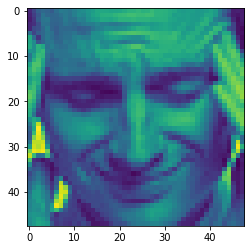

In [26]:
sample_images = x_test[1].reshape(48, 48)
plt.imshow(sample_images)

In [27]:
result = model.predict(x_test)
np.argmax(result[1])

0

In [28]:
check_result = []
result_sum = 0
for result in model.predict(x_test):
    check_result.append(result)
    result_sum += np.argmax(result)
result_sum
check_result

[array([9.9890029e-01, 5.9028320e-05, 2.8457373e-06, 1.0377418e-03],
       dtype=float32),
 array([9.9163461e-01, 7.5303796e-03, 2.7254013e-05, 8.0771616e-04],
       dtype=float32),
 array([0.9039238 , 0.04018741, 0.01242116, 0.04346763], dtype=float32),
 array([0.9775237 , 0.00175108, 0.00886267, 0.01186252], dtype=float32),
 array([0.92463684, 0.00261457, 0.00218962, 0.07055894], dtype=float32),
 array([0.12271553, 0.00366413, 0.07599688, 0.7976235 ], dtype=float32),
 array([0.6685261 , 0.03492132, 0.00921874, 0.28733385], dtype=float32),
 array([9.9276721e-01, 1.5558368e-03, 1.2904116e-04, 5.5479351e-03],
       dtype=float32),
 array([0.7162226 , 0.06377283, 0.01027708, 0.20972751], dtype=float32),
 array([9.8521686e-01, 1.4302883e-09, 8.0590034e-06, 1.4775032e-02],
       dtype=float32),
 array([9.9973148e-01, 2.1095034e-04, 1.3516196e-05, 4.4066972e-05],
       dtype=float32),
 array([9.7420949e-01, 1.3066495e-04, 4.5896461e-03, 2.1070244e-02],
       dtype=float32),
 array([9.

In [29]:
model_json = model.to_json()
with open("utils/model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
model.save('utils/model_weights.h5')